# Project 2 - EN.605.662
## Due September 28
## Nathan McIntosh
---
Explore and analyze the data using Excel, Google Spreadsheets, R, Python, Matlab, Tableau, or simply by hand (drawing pictures or equations is fine).  What are the characteristics of the data?  Describe each of the data elements and list their category (nominal, ordinal, quantitative, etc...)

This notebook is where the data processing will go.

In [2]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

%matplotlib inline

In [3]:
data = pd.read_csv(
    "Salaries.csv", 
    dtype={"JobTitle":"category", "Status":"category", "Agency":"category"}, 
    na_values="Not Provided",
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Id                148654 non-null  int64   
 1   EmployeeName      148652 non-null  object  
 2   JobTitle          148654 non-null  category
 3   BasePay           148045 non-null  float64 
 4   OvertimePay       148650 non-null  float64 
 5   OtherPay          148650 non-null  float64 
 6   Benefits          112491 non-null  float64 
 7   TotalPay          148654 non-null  float64 
 8   TotalPayBenefits  148654 non-null  float64 
 9   Year              148654 non-null  int64   
 10  Notes             0 non-null       float64 
 11  Agency            148654 non-null  category
 12  Status            38119 non-null   category
dtypes: category(3), float64(7), int64(2), object(1)
memory usage: 12.0+ MB


Let's go through each of the columns and examine it in turn

---
### ID
This is an integer. Each employee has a unique ID number. The data is stored in a quantitative data type, but it represents nominal data (each employee gets their own ID number)

In [4]:
def plot_hist_w_labels(df: pd.DataFrame, col: str):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)
    axes.hist(df[col])
    axes.set_title(f"Distribution of {col}")
    axes.set_xlabel(col)
    axes.set_ylabel("Frequency")

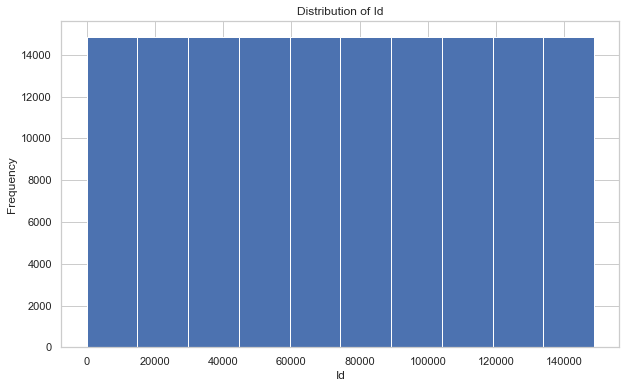

In [5]:
# data.Id.hist()
plot_hist_w_labels(data, "Id")

As we can see, the IDs are distributed evenly across all the employees. 

---
### EmployeeName
EmployeeName is a nominal data type. I would expect that most names are seen at most once or twice, and a few many times

In [4]:
data.EmployeeName.describe()

count        148652
unique       110810
top       Kevin Lee
freq             13
Name: EmployeeName, dtype: object

In [5]:
data.EmployeeName.value_counts().head(20)

Kevin Lee            13
William Wong         11
Steven Lee           11
Richard Lee          11
Michael Wong          9
John Chan             9
KEVIN LEE             9
Stanley Lee           9
William Lee           8
RICHARD LEE           8
Victor Lee            8
DAVID WONG            8
MICHAEL LEE           8
David Wong            8
Michael Brown         7
STEVEN LEE            7
MICHAEL BROWN         7
Amelie E Bullard      7
Michael A Johnson     7
WILLIAM WONG          7
Name: EmployeeName, dtype: int64

There is clearly some inconsistency in how names are stored: some are all upper case, some just have first letter upper-cased. Let's make it all upper case and see if anythign changes

In [6]:
data.EmployeeName.str.upper().value_counts().head(20)

KEVIN LEE        22
RICHARD LEE      19
WILLIAM WONG     18
STEVEN LEE       18
DAVID WONG       16
STANLEY LEE      16
MICHAEL LEE      15
JOHN CHAN        15
WILLIAM LEE      14
MICHAEL WONG     14
MICHAEL BROWN    14
VICTOR LEE       12
ALAN WONG        11
JOHN LEE         11
VINCENT WONG     11
SANDY WONG       11
JOHN MILLER      11
THOMAS SMITH     10
STEPHEN LEE      10
ROBERT WONG      10
Name: EmployeeName, dtype: int64

How often do each of the values appear?

<AxesSubplot:xlabel='same_name'>

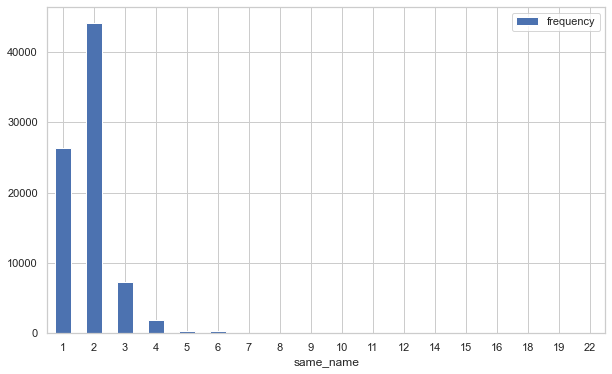

In [8]:
(
    data
    .EmployeeName
    .str.upper()
    .value_counts()
    .value_counts(sort=False)
    .reset_index()
    .rename(columns = {"index":"same_name", "EmployeeName":"frequency"})
    .plot.bar(x = "same_name", figsize = (10,6), rot = 0)
)

Looks like there are more names that occur twice than there are names that occur once! This distribution also seems to drop off quite rapidly

---
### JobTitle
JobTitle is a categorical variable, which is a type of nominal data. This represents the job a person is employed by the city to carry out. 

In [8]:
data.JobTitle.describe()

count               148654
unique                2159
top       Transit Operator
freq                  7036
Name: JobTitle, dtype: object

There are 2159 unique job types. Let's see what some of the most common are

<AxesSubplot:>

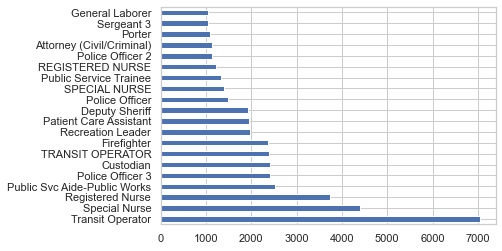

In [9]:
data.JobTitle.value_counts().head(20).plot.barh()

---
### BasePay
I guess that BasePay is how much an employee receives in their regular paycheck. It is a quantitative value. 

In [10]:
data.BasePay.describe()

count    148045.000000
mean      66325.448840
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

It looks like there are negative values. For the purpose of this analysis, I will assume this is a clerical error, and that negative salaries can be ignored. 

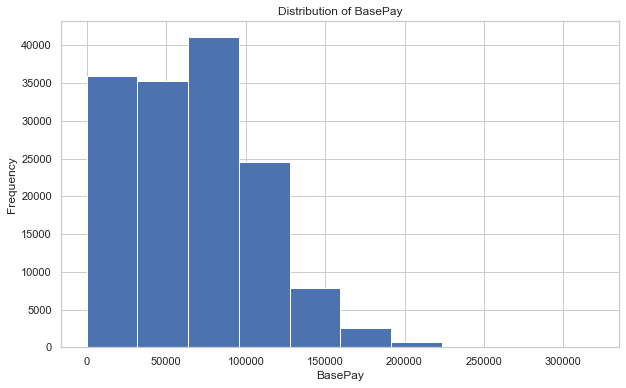

In [10]:
# data.BasePay.hist()
plot_hist_w_labels(data, "BasePay")

<AxesSubplot:>

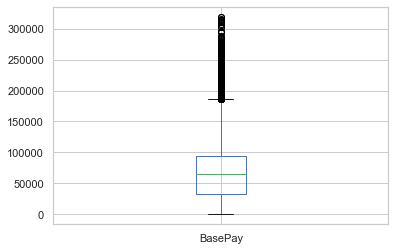

In [9]:
data.BasePay.plot.box()

It looks like the majority of the employees are making somewhere between \\$50k and $100k. This makes sense, because the median is \\$65k. The number of employees who get paid more than \\$100k is rather small. 

---
### OvertimePay
OvertimePay is probably how much the employee was paid for overtime work over the course of a year. This is a quantitative variable.

In [12]:
data.OvertimePay.describe()

count    148650.000000
mean       5066.059886
std       11454.380559
min          -0.010000
25%           0.000000
50%           0.000000
75%        4658.175000
max      245131.880000
Name: OvertimePay, dtype: float64

<AxesSubplot:>

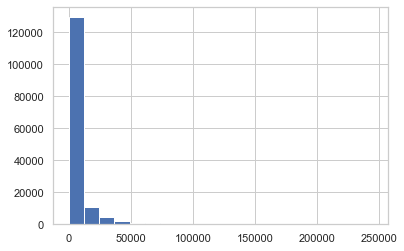

In [17]:
data.OvertimePay.hist(bins=20)

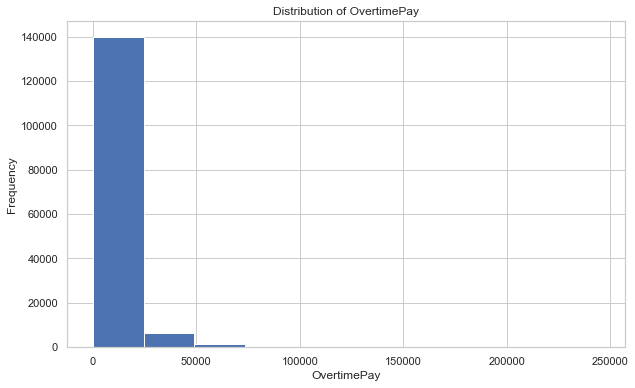

In [11]:
plot_hist_w_labels(data, "OvertimePay")

This shows that the vast majority of overtime pay did not amount to large sums. However, there were a few cases of people who were paid up to and over \\$200k

---
### OtherPay
OtherPay is probably income that did not come from the city of San Francisco. It is a quantitative variable

In [20]:
data.OtherPay.describe()

count    148650.000000
mean       3648.767297
std        8056.601866
min       -7058.590000
25%           0.000000
50%         811.270000
75%        4236.065000
max      400184.250000
Name: OtherPay, dtype: float64

Again, the issue of negative values appears. Again I will ignore it for now.

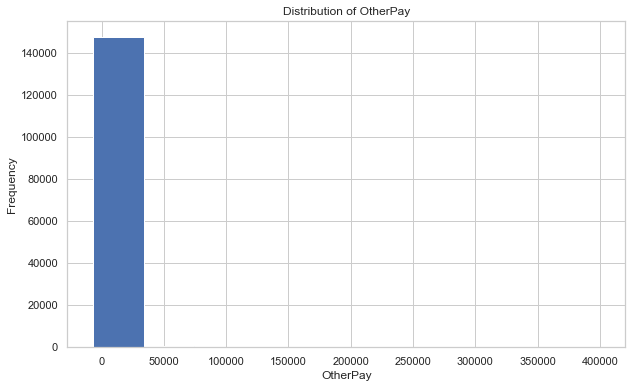

In [12]:
# data.OtherPay.hist()
plot_hist_w_labels(data, "OtherPay")

This shows that very few people make much money outside of their role as a city employee. And once again, there are a very few people who made a considerable amount of money outside of their job for San Francisco

---
### Benefits
Benefits is likely the monetary value of benefits that each employee received.

In [24]:
data.Benefits.describe()

count    112491.000000
mean      25007.893151
std       15402.215858
min         -33.890000
25%       11535.395000
50%       28628.620000
75%       35566.855000
max       96570.660000
Name: Benefits, dtype: float64

It seems like most employees are getting a decent bit of benefits from the city. 

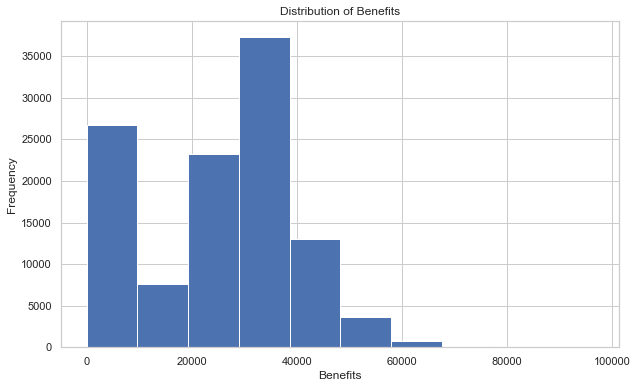

In [13]:
# data.Benefits.hist()
plot_hist_w_labels(data, "Benefits")

This shows a bimodal distribution. There are some people who receive < \\$5k, and a larger number of people who receieve around \$30k in benefits. 

---
### TotalPay
Total Pay is probably the sum of BasePay, OvertimePay, and OtherPay. Like those, this is a quantitative variable.

In [26]:
data.TotalPay.describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

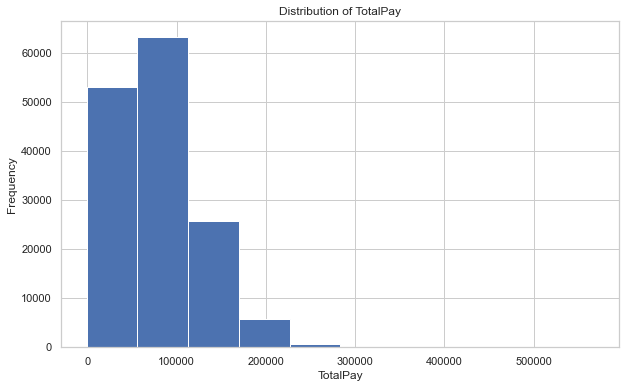

In [14]:
# data.TotalPay.hist()
plot_hist_w_labels(data, "TotalPay")

It seems like the majority of people make < \\$100k, and some few make up to and over \$500k. This also looks a bit like a [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution)

---
### TotalPayBenefits
TotalPayBenefits is probably the sum of TotalPay and Benefits. It is a quantitative variable. 

In [28]:
data.TotalPayBenefits.describe()

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

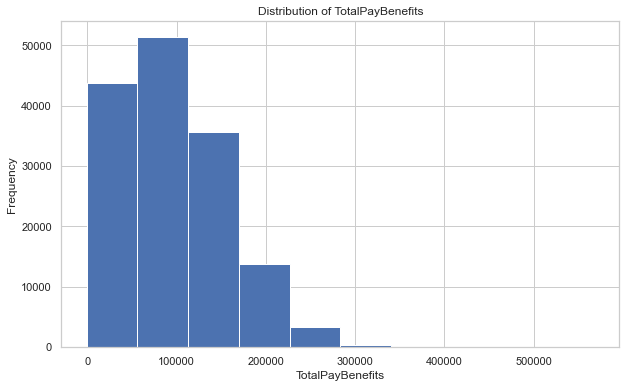

In [15]:
# data.TotalPayBenefits.hist()
plot_hist_w_labels(data, "TotalPayBenefits")

Again, this looks somewhat lognormal. The scale is shifted slightly to the right as well, which is as expected.

---
### Year

Year is the year for which a row of data is recorded

In [31]:
data.Year.value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

<AxesSubplot:>

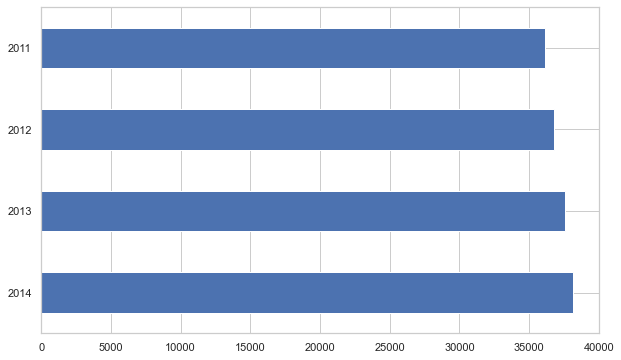

In [20]:
data.Year.value_counts().plot.barh(figsize = (10,6))

Here we can see that the city of San Francisco hired successively more people year on year from 2011 to 2014. 

---
### Notes

In this case, there are only NaN values, representing no notes, in all cases. 

In [35]:
data.Notes.unique()

array([nan])

---
### Agency

In this case, since everyone worked for the city of San Francisco, that is listed in all cases. 

In [36]:
data.Agency.value_counts()

San Francisco    148654
Name: Agency, dtype: int64

---
### Status
Status is whether the person worked full time or part time for the city. 

In [46]:
data.Status.value_counts(normalize=True)

FT    0.585902
PT    0.414098
Name: Status, dtype: float64

<AxesSubplot:>

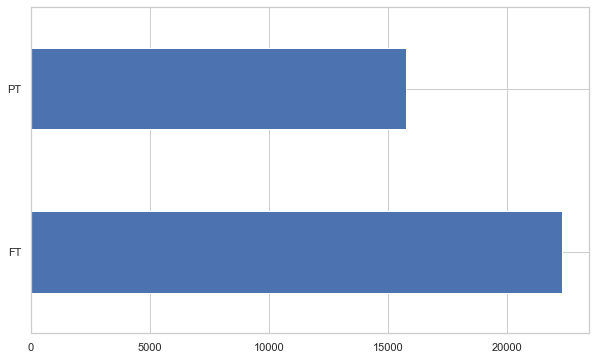

In [21]:
data.Status.value_counts().plot.barh(figsize = (10,6))

It looks like there were more people who worked for the city full time than part time. However, it is clear that part time workers make up a sizable portion